In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
from typing import *

import torch
import torch.optim as optim

In [2]:
from fastai import *
from fastai.vision import *
from fastai.text import *
from fastai.callbacks import *

In [3]:
#%%bash
#pip install pytorch-pretrained-bert

In [4]:
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True  #needed
torch.backends.cudnn.benchmark = False

In [5]:
device='cuda'
torch.cuda.set_device(1)

In [6]:
from sklearn.model_selection import train_test_split

DATA_ROOT = Path("") 

train, test = [pd.read_csv(DATA_ROOT / fname) for fname in ["task2_trainset.csv", "task2_public_testset.csv"]]

In [7]:
train.drop('Title',axis=1,inplace=True)
train.drop('Categories',axis=1,inplace=True)
test.drop('Title',axis=1,inplace=True)
test.drop('Categories',axis=1,inplace=True)
####################################################
train.drop('Created Date',axis=1, inplace=True)
train.drop('Authors',axis=1,inplace=True)
test.drop('Created Date',axis=1, inplace=True)
test.drop('Authors',axis=1,inplace=True)

In [8]:
train['THEORETICAL']=0
train['ENGINEERING']=0
train['EMPIRICAL']=0
train['OTHERS']=0
for i in range(train.Id.count()):
    string = train['Task 2'][i]
    train['THEORETICAL'][i] = 1 if (string.find('THEORETICAL')!=-1) else 0
    train['ENGINEERING'][i] = 1 if (string.find('ENGINEERING')!=-1) else 0
    train['EMPIRICAL'][i] = 1 if (string.find('EMPIRICAL')!=-1) else 0
    train['OTHERS'][i] = 1 if (string.find('OTHERS')!=-1) else 0   
train.head()

/home/IPL915/.conda/envs/KIWI/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/IPL915/.conda/envs/KIWI/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/IPL915/.conda/envs/KIWI/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/IPL915/.co

,Id,Abstract,Task 2,THEORETICAL,ENGINEERING,EMPIRICAL,OTHERS
0,D00001,Rapid popularity of Internet of Things (IoT) a...,THEORETICAL,1,0,0,0
1,D00002,"In this paper, we address the problem of compu...",THEORETICAL,1,0,0,0
2,D00003,High quality upsampling of sparse 3D point clo...,ENGINEERING,0,1,0,0
3,D00004,Internet is the main source of information now...,EMPIRICAL,0,0,1,0
4,D00005,Automated Facial Expression Recognition (FER) ...,ENGINEERING,0,1,0,0


In [9]:
train.drop('Task 2',axis=1,inplace=True)
train

,Id,Abstract,THEORETICAL,ENGINEERING,EMPIRICAL,OTHERS
0,D00001,Rapid popularity of Internet of Things (IoT) a...,1,0,0,0
1,D00002,"In this paper, we address the problem of compu...",1,0,0,0
2,D00003,High quality upsampling of sparse 3D point clo...,0,1,0,0
3,D00004,Internet is the main source of information now...,0,0,1,0
4,D00005,Automated Facial Expression Recognition (FER) ...,0,1,0,0
...,...,...,...,...,...,...
6995,D06996,We have witnessed the discovery of many techni...,1,1,0,0
6996,D06997,State-of-the-art slot filling models for goal-...,0,1,0,0
6997,D06998,Real-time semantic segmentation plays an impor...,0,1,0,0
6998,D06999,We propose a neural embedding algorithm called...,1,0,1,0


In [10]:
for i in range(train.Id.count()):
    train['Abstract'][i]=train['Abstract'][i].replace("$$$", " ")
    train['Abstract'][i]=train['Abstract'][i].replace(".", " ")
    train['Abstract'][i]=train['Abstract'][i].replace(":", " ")    
    train['Abstract'][i]=train['Abstract'][i].replace("%", "percentage")
    train['Abstract'][i]=train['Abstract'][i].replace("%", "in other word")
for i in range(test.Id.count()):
    test['Abstract'][i]=test['Abstract'][i].replace("$$$", " ")
    test['Abstract'][i]=test['Abstract'][i].replace(".", " ")
    test['Abstract'][i]=test['Abstract'][i].replace(":", " ")
    test['Abstract'][i]=test['Abstract'][i].replace("%", "percentage")
    test['Abstract'][i]=test['Abstract'][i].replace("%", "in other word")

/home/IPL915/.conda/envs/KIWI/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/IPL915/.conda/envs/KIWI/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/IPL915/.conda/envs/KIWI/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [11]:
train, val = train_test_split(train, shuffle=True, test_size=0.2, random_state=SEED)

In [12]:
train.head()

,Id,Abstract,THEORETICAL,ENGINEERING,EMPIRICAL,OTHERS
1032,D01033,"Many computer vision applications, such as obj...",1,1,0,0
6339,D06340,Many experimental proposals for noisy intermed...,1,0,0,0
3886,D03887,In the present paper we describe the technolog...,0,1,0,0
2653,D02654,An important property of programming language ...,1,0,0,0
6914,D06915,Multilingual topic models enable crosslingual ...,0,1,0,0


In [13]:
train['Abstract'][0]

'Rapid popularity of Internet of Things (IoT) and cloud computing permits neuroscientists to collect multilevel and multichannel brain data to better understand brain functions, diagnose diseases, and devise treatments  To ensure secure and reliable data communication between end-to-end (E2E) devices supported by current IoT and cloud infrastructure, trust management is needed at the IoT and user ends  This paper introduces a Neuro-Fuzzy based Brain-inspired trust management model (TMM) to secure IoT devices and relay nodes, and to ensure data reliability  The proposed TMM utilizes node behavioral trust and data trust estimated using Adaptive Neuro-Fuzzy Inference System and weighted-additive methods respectively to assess the nodes trustworthiness  In contrast to the existing fuzzy based TMMs, the NS2 simulation results confirm the robustness and accuracy of the proposed TMM in identifying malicious nodes in the communication network  With the growing usage of cloud based IoT framewor

In [14]:
val.head()

,Id,Abstract,THEORETICAL,ENGINEERING,EMPIRICAL,OTHERS
6500,D06501,In this paper we present the Creative Inventio...,0,0,0,1
2944,D02945,Computer algorithms are written with the inten...,0,1,0,0
2024,D02025,The problem of finding the maximum number of v...,1,0,0,0
263,D00264,Real-world machine learning applications often...,1,0,0,0
4350,D04351,Typically an ontology matching technique is a ...,0,0,1,0


In [15]:
test.head()

,Id,Abstract
0,T00001,Mobile Crowdsensing is a promising paradigm fo...
1,T00002,A keyboard has many function keys and each fun...
2,T00003,With increasing availability of communication ...
3,T00004,The clustered planarity problem (c-planarity) ...
4,T00005,We introduce a genetic programming method for ...


In [16]:
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)

torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True  #needed
torch.backends.cudnn.benchmark = False

In [17]:
class Config(dict):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        for k, v in kwargs.items():
            setattr(self, k, v)
    
    def set(self, key, val):
        self[key] = val
        setattr(self, key, val)

config = Config(
    testing=False,
    bert_model_name="bert-base-cased",    
    max_lr=3e-5,
    epochs=6,
    use_fp16=False,
    bs=32,
    discriminative=False,
    max_seq_len=330,
)

In [18]:
from pytorch_pretrained_bert import BertTokenizer
bert_tok = BertTokenizer.from_pretrained(
    config.bert_model_name,
)

The pre-trained model you are loading is a cased model but you have not set `do_lower_case` to False. We are setting `do_lower_case=False` for you but you may want to check this behavior.


In [19]:
class FastAiBertTokenizer(BaseTokenizer):
    """Wrapper around BertTokenizer to be compatible with fast.ai"""
    def __init__(self, tokenizer: BertTokenizer, max_seq_len: int=128, **kwargs):
        self._pretrained_tokenizer = tokenizer
        self.max_seq_len = max_seq_len

    def __call__(self, *args, **kwargs):
        return self

    def tokenizer(self, t:str) -> List[str]:
        """Limits the maximum sequence length"""
        return ["[CLS]"] + self._pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2] + ["[SEP]"]

In [20]:
if config.testing:
    train = train.head(1024)
    val = val.head(1024)
    test = test.head(1024)

In following code snippets, we need to wrap BERT vocab and BERT tokenizer with Fastai modules

In [21]:
fastai_bert_vocab = Vocab(list(bert_tok.vocab.keys()))

In [22]:
fastai_tokenizer = Tokenizer(tok_func=FastAiBertTokenizer(bert_tok, max_seq_len=config.max_seq_len), pre_rules=[], post_rules=[])

In [23]:
label_cols = ["THEORETICAL", "ENGINEERING", "EMPIRICAL", "OTHERS"]

# databunch = TextDataBunch.from_df(".", train, val, test,
#                   tokenizer=fastai_tokenizer,
#                   vocab=fastai_bert_vocab,
#                   include_bos=False,
#                   include_eos=False,
#                   text_cols="comment_text",
#                   label_cols=label_cols,
#                   bs=config.bs,
#                   collate_fn=partial(pad_collate, pad_first=False, pad_idx=0),
#              )

Alternatively, we can pass our own list of Preprocessors to the databunch (this is effectively what is happening behind the scenes)

In [24]:
class BertTokenizeProcessor(TokenizeProcessor):
    def __init__(self, tokenizer):
        super().__init__(tokenizer=tokenizer, include_bos=False, include_eos=False)

class BertNumericalizeProcessor(NumericalizeProcessor):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, vocab=Vocab(list(bert_tok.vocab.keys())), **kwargs)

def get_bert_processor(tokenizer:Tokenizer=None, vocab:Vocab=None):
    """
    Constructing preprocessors for BERT
    We remove sos/eos tokens since we add that ourselves in the tokenizer.
    We also use a custom vocabulary to match the numericalization with the original BERT model.
    """
    return [BertTokenizeProcessor(tokenizer=tokenizer),
            NumericalizeProcessor(vocab=vocab)]

In [25]:
class BertDataBunch(TextDataBunch):
    @classmethod
    def from_df(cls, path:PathOrStr, train_df:DataFrame, valid_df:DataFrame, test_df:Optional[DataFrame]=None,
                tokenizer:Tokenizer=None, vocab:Vocab=None, classes:Collection[str]=None, text_cols:IntsOrStrs=1,
                label_cols:IntsOrStrs=0, label_delim:str=None, **kwargs) -> DataBunch:
        "Create a `TextDataBunch` from DataFrames."
        p_kwargs, kwargs = split_kwargs_by_func(kwargs, get_bert_processor)
        # use our custom processors while taking tokenizer and vocab as kwargs
        processor = get_bert_processor(tokenizer=tokenizer, vocab=vocab, **p_kwargs)
        if classes is None and is_listy(label_cols) and len(label_cols) > 1: classes = label_cols
        src = ItemLists(path, TextList.from_df(train_df, path, cols=text_cols, processor=processor),
                        TextList.from_df(valid_df, path, cols=text_cols, processor=processor))
        src = src.label_for_lm() if cls==TextLMDataBunch else src.label_from_df(cols=label_cols, classes=classes)
        if test_df is not None: src.add_test(TextList.from_df(test_df, path, cols=text_cols))
        return src.databunch(**kwargs)

In this project, we will be using Databunch which is easier to create and use.

In [26]:
# this will produce a virtually identical databunch to the code above
databunch = BertDataBunch.from_df(".", train, val, test,
                  tokenizer=fastai_tokenizer,
                  vocab=fastai_bert_vocab,
                  text_cols="Abstract",
                  label_cols=label_cols,
                  bs=config.bs,
                  collate_fn=partial(pad_collate, pad_first=False, pad_idx=0),
             )

In [27]:
databunch.show_batch()

text,target
"[CLS] O ##bject ##ive image quality assessment ( I ##Q ##A ) is imp ##erative in the current multimedia - intensive world , in order to assess the visual quality of an image at close to a human level of ability Many ~ parameters such as color intensity , structure , sharp ##ness , contrast , presence of an object , etc , draw human attention to an image Psychological",ENGINEERING;EMPIRICAL
"[CLS] The behavior of he ##tero ##gene ##ous multi - agent systems is studied when the coupling matrices are possibly all different and / or singular ( that is , its rank is less than the system dimension ) Rank - def ##icient coupling allows exchange of limited state information , which is suitable for study of output coupling in multi - agent systems We present a coordinate change that",THEORETICAL
"[CLS] Reviews spa ##ms are prevalent in e - commerce to manipulate product ranking and customers decisions ma ##lic ##iously While spa ##ms generated based on simple spa ##mming strategy can be detected effectively , hardened spa ##mmer ##s can e ##vade regular detector ##s via more advanced spa ##mming strategies Previous work gave more attention to e ##vas ##ion against text and graph - based detector ##s , but",ENGINEERING
"[CLS] Pre ##diction of new drug - target interactions is extremely important as it can lead the researchers to find new uses for old drugs and to realize the therapeutic profiles or side effects thereof However , experimental prediction of drug - target interactions is expensive and time - consuming As a result , computational methods for prediction of new drug - target interactions have gained much interest in recent",ENGINEERING;EMPIRICAL
"[CLS] Numerous variants of Self - Organ ##izing Map ##s ( S ##OM ##s ) have been proposed in the literature , including those which also possess an underlying structure , and in some cases , this structure itself can be defined by the user Although the concepts of growing the S ##OM and up ##dating it have been studied , the whole issue of using a self - organizing",THEORETICAL


# Model

In [28]:
from pytorch_pretrained_bert.modeling import BertConfig, BertForSequenceClassification
bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels=4)

100%|██████████| 404400730/404400730 [00:32<00:00, 12258309.58B/s]


In [29]:
loss_func = nn.BCEWithLogitsLoss()

In [30]:
from fastai.callbacks import *

learner = Learner(
    databunch, bert_model,
    loss_func=loss_func,
)
if config.use_fp16: learner = learner.to_fp16()

In [31]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


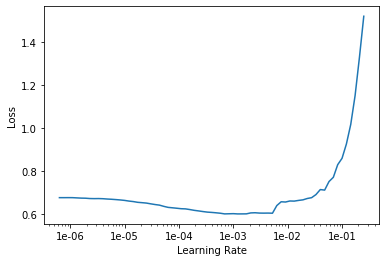

In [32]:
learner.recorder.plot()

In [33]:
learner.fit_one_cycle(4, max_lr=config.max_lr)

epoch,train_loss,valid_loss,time
0,0.490380,0.445529,02:05
1,0.424998,0.413733,02:05
2,0.369863,0.400245,02:05
3,0.317275,0.406166,02:04


In [34]:
def get_preds_as_nparray(ds_type) -> np.ndarray:
    """
    the get_preds method does not yield the elements in order by default
    we borrow the code from the RNNLearner to resort the elements into their correct order
    """
    preds = learner.get_preds(ds_type)[0].detach().cpu().numpy()
    sampler = [i for i in databunch.dl(ds_type).sampler]
    reverse_sampler = np.argsort(sampler)
    return preds[reverse_sampler, :]

In [35]:
test_preds = get_preds_as_nparray(DatasetType.Test)

In [36]:
test_preds

array([[0.711511, 0.58274 , 0.274376, 0.00357 ],
       [0.112375, 0.861318, 0.122378, 0.100899],
       [0.771205, 0.780038, 0.042472, 0.00659 ],
       [0.978331, 0.073764, 0.060668, 0.010353],
       ...,
       [0.579825, 0.872214, 0.070109, 0.004841],
       [0.958929, 0.131586, 0.061255, 0.011239],
       [0.325099, 0.910659, 0.077551, 0.00962 ],
       [0.322408, 0.70816 , 0.071588, 0.071893]], dtype=float32)

In [37]:
threshold_preds = (test_preds>=0.5).astype(int)
threshold_preds

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]])

In [38]:
def SubmitGenerator(prediction, sampleFile, public=True, filename='prediction.csv'):
    """
    Args:
        prediction (numpy array)
        sampleFile (str)
        public (boolean)
        filename (str)
    """
    sample = pd.read_csv(sampleFile)
    submit = {}
    submit['order_id'] = list(sample.order_id.values)
    redundant = len(sample) - prediction.shape[0]
    if public:
        submit['THEORETICAL'] = list(prediction[:,0]) + [0]*redundant
        submit['ENGINEERING'] = list(prediction[:,1]) + [0]*redundant
        submit['EMPIRICAL'] = list(prediction[:,2]) + [0]*redundant
        submit['OTHERS'] = list(prediction[:,3]) + [0]*redundant
    else:
        submit['THEORETICAL'] = [0]*redundant + list(prediction[:,0])
        submit['ENGINEERING'] = [0]*redundant + list(prediction[:,1])
        submit['EMPIRICAL'] = [0]*redundant + list(prediction[:,2])
        submit['OTHERS'] = [0]*redundant + list(prediction[:,3])
    df = pd.DataFrame.from_dict(submit) 
    df.to_csv(filename,index=False)

In [39]:
SubmitGenerator(threshold_preds, 
                'task2_sample_submission.csv',
                True, 
                'task2_submission.csv')

In [40]:
import time
torch.cuda.empty_cache() 
time.sleep(100)